In [1]:
%matplotlib
import numpy as np
import sys
import math
import matplotlib.pyplot as plt

Using matplotlib backend: Qt5Agg


In [2]:
#Тестовая функция
def ApproxFunc(x):
    return np.sin(x)*10 + x**2
    #return x**2
    #return np.sin(x)

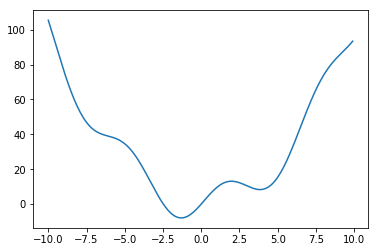

In [3]:
#Интервал, на котором будем аппроксимировать функцию
pcenter = 0
prange = 10
step = 0.1
period = np.arange(pcenter-prange, pcenter+prange, step)
plt.plot(period, ApproxFunc(period))


In [4]:
#Модифицированная нейросеть
class PartyNN(object):
    
    def __init__(self, learning_rate=0.1, input_nodes=1, hidden_nodes=5, output_nodes=1):
        input_nodes+=1
        self.weights_0_1 = np.random.normal(0.0, hidden_nodes ** -0.5, (hidden_nodes, input_nodes))
        self.weights_1_2 = np.random.normal(0.0, output_nodes ** -0.5, (output_nodes, hidden_nodes))
        self.sigmoid_mapper = np.vectorize(self.sigmoid)
        self.learning_rate = np.array([learning_rate])
        
    def set_lr(lr):
        self.learning_rate = np.array([lr])
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def predict(self, inputs):
        inputs = np.concatenate((inputs,[1]))
        inputs_1 = np.dot(self.weights_0_1, inputs)
        outputs_1 = self.sigmoid_mapper(inputs_1)
        
        inputs_2 = np.dot(self.weights_1_2, outputs_1)
        #outputs_2 = self.sigmoid_mapper(inputs_2)
        outputs_2 = inputs_2
        return outputs_2
    
    def train(self, inputs, expected_predict):
        inputs = np.concatenate((inputs,[1]))        
        inputs_1 = np.dot(self.weights_0_1, inputs)
        outputs_1 = self.sigmoid_mapper(inputs_1)
        
        inputs_2 = np.dot(self.weights_1_2, outputs_1)
        #outputs_2 = self.sigmoid_mapper(inputs_2)
        outputs_2 = inputs_2
        actual_predict = outputs_2[0]
        
        error_layer_2 = np.array([actual_predict - expected_predict])
        gradient_layer_2 = 1 # Здесь что-то я не так сделал. Нужно учитывать вес# actual_predict * (1 - actual_predict)
        weights_delta_layer_2 = error_layer_2 * gradient_layer_2  
        self.weights_1_2 -= (np.dot(weights_delta_layer_2, outputs_1.reshape(1, len(outputs_1)))) * self.learning_rate
        
        error_layer_1 = weights_delta_layer_2 * self.weights_1_2
        gradient_layer_1 = outputs_1 * (1 - outputs_1)
        weights_delta_layer_1 = error_layer_1 * gradient_layer_1
        self.weights_0_1 -= np.dot(inputs.reshape(len(inputs), 1), weights_delta_layer_1).T  * self.learning_rate
        

In [5]:
#Создаем экземпляр нецйросети
lr=0.00005
myNN=PartyNN(learning_rate=lr, input_nodes=1, hidden_nodes=50, output_nodes=1)

In [6]:
print(myNN.weights_1_2)

[[-1.61828555 -0.78305008 -1.55009503 -0.58327413 -1.38639725 -1.07962858
   2.27633647 -1.64262499 -0.18255566 -0.70524141 -0.43408946  0.55210436
   0.37987507 -0.00485694  0.38481898  0.71197814 -0.16424337 -1.36743668
   1.76450791 -0.3052234   0.14589898 -0.30156399  0.31269527 -1.44010465
   0.73866458  0.35423494  0.79600804  0.36607209  0.77682009 -1.56291004
   0.1505571   0.48967953  1.65157512  1.86090653  0.87940012  0.9918933
   2.31560467  1.09688032  0.63498361 -0.284135    0.18738873  1.6245675
  -1.13300049  1.66572618 -0.50307629  1.25320608 -0.64836668 -0.74234739
   1.47913661 -0.89634514]]


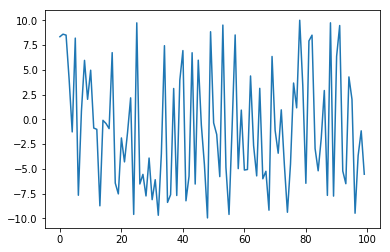

In [7]:
set_count = 100
rand_set = np.random.random(set_count)*2*prange-prange+pcenter
plt.plot(rand_set)

In [8]:
#Функция обучения
def Train():
    rand_set = np.random.random(set_count)*2*prange-prange+pcenter
    for x in range(0, set_count-1):
        myNN.train([rand_set[x]], ApproxFunc(rand_set[x]))

In [179]:
def MSE(y, Y):
    return np.mean((y-Y)**2)

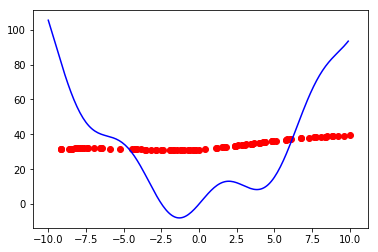

790.695983281242


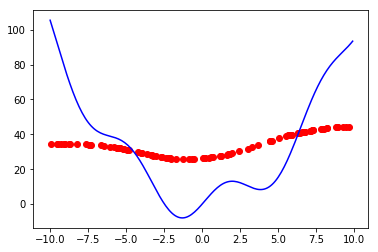

624.4816091561511


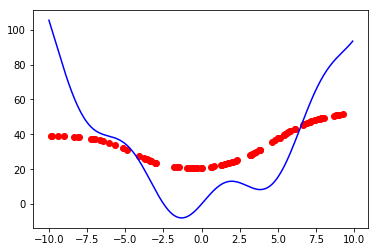

446.26506884080015


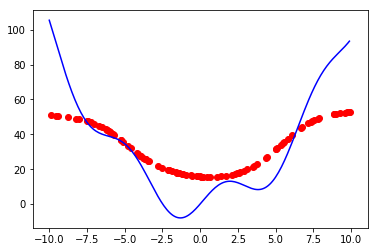

332.6779692160911


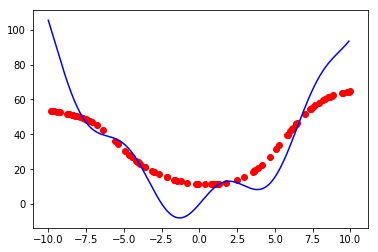

237.47497301386426


KeyboardInterrupt: 

In [9]:
epochs = 100
plt.ion()
for e in range(epochs):
    for tr in range(100):
        Train()
    plt.clf()
    plt.plot(period, ApproxFunc(period), 'blue')
    rand_set = np.random.random(set_count)*2*prange-prange+pcenter
    result_set=np.zeros(100)
    MSE=0
    for x in range(0, set_count-1):
        result_set[x] = myNN.predict([rand_set[x]])
        MSE+= (ApproxFunc(rand_set[x]) - result_set[x])**2
        plt.scatter(rand_set[x], result_set[x], c='red')
    plt.pause(1)    
    print(MSE/set_count)

In [ ]:
myNN.set_lr(0.000001)